        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington

<h1 align='center' style="color: blue;">Assignment #4</h1>

<b>Question #1</b>: Use the <b>Health_care.csv</b> file. This file consists of a labeled dataset of 10,000 users in Twitter. Descriptions are captured from profile of users and labeled are assigned to them based on the profession (1= healthcare professional, 0= Non-healthcare professional)
<ol>
    <li>Use an image to form a wordcloud using the healthcare professional users' descriptions</li>
    <li>Create the document term frequency matrix (X) using CountVectorizer</li>
    <li>Use multinomial NB to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use Regression Forest to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use Stochastic Gradient Descent to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use logistic regression to form a predictive model and test the accuracy of your model</li>
    <ul>
            <li>Use 10-fold cross validation to test the performace of your model</li>
            <li><b>hc_related</b> is your dependent variable</li>
    </ul>
    <li>Use LDA to find 5 topics in description of health professional users</li>
<ol>

In [3]:
#necessary imports
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

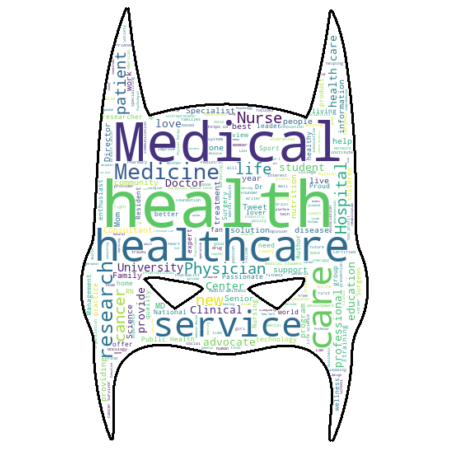

In [4]:
# Write your answer here (part1)
stopwords = set(STOPWORDS)
healthCare = pd.read_csv('Health_care.csv',index_col=0)

nonHC = healthCare[healthCare['hc_related']==0].index

healthCare.drop(nonHC, inplace=True)

text1 = " ".join(X for X in healthCare.description)
vect1 = CountVectorizer(stop_words='english')
X1 = vect1.fit_transform(healthCare.description)

bat_mask = np.array(Image.open("bat_mask.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transformed_bat_mask = np.ndarray((bat_mask.shape[0],
                                    bat_mask.shape[1]), np.int32)

for i in range(len(bat_mask)):
    transformed_bat_mask[i] = list(map(transform_format, bat_mask[i]))

wc = WordCloud(background_color="white", max_words=1000,
               mask=transformed_bat_mask,
               stopwords=stopwords, contour_width=3, 
               contour_color='black')
wc.generate(text1)

plt.figure(figsize=[10,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

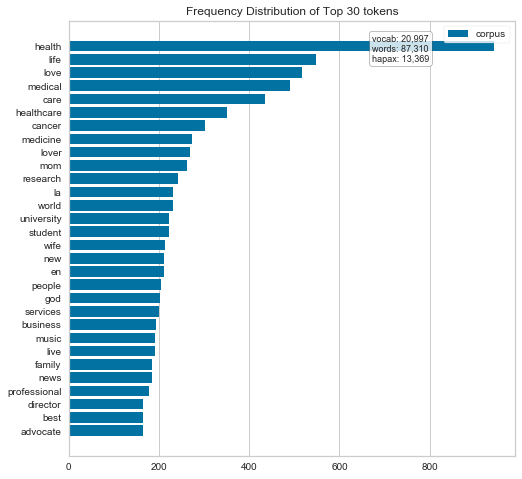

In [5]:
# Write your answer here (part2)

from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

healthCare = pd.read_csv('Health_care.csv',index_col=0)
text = " ".join(X for X in healthCare.description)

description = healthCare[healthCare.columns[1]]
hc_related = healthCare[healthCare.columns[0]]

y, text = hc_related, description

vect = CountVectorizer(stop_words='english')
X = vect.fit_transform(healthCare.description)

# Get all features (tokens)
features = vect.get_feature_names()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(X)
visualizer.poof()

In [6]:
# Write your answer here (part3)

# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 

model = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for MultinomialNB: {}".format(accuracy_score(y_test, y_test_hat, normalize = True) * 100))

Accuracy for MultinomialNB: 86.23333333333333


In [7]:
# Write your answer here (part4)

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

randForestModel = RandomForestClassifier()

randForestModel.fit(X_train,y_train)

rf_y_hat = randForestModel.predict(X_test)

print("Accuracy for Random Forest Classifier : {}".format(accuracy_score(y_test, rf_y_hat, normalize = True) * 100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for Random Forest Classifier : 90.86666666666666


In [8]:
# Write your answer here (part5)

from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for SGDClassifier: {}".format(accuracy_score(y_test, y_test_hat, normalize = True) * 100))

Accuracy for SGDClassifier: 91.03333333333333


In [9]:
# Write your answer here (part6)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_test_hat = model.predict(X_test)
print("Accuracy for Logistic Regression: {}".format(accuracy_score(y_test, y_test_hat, normalize = True) * 100))

Accuracy for Logistic Regression: 91.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# Write your answer here (part7)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X1)
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
topic_names = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])]
topic_names

[' 0 cll analyze',
 ' 1 diabetes anew',
 ' 2 cll diabetes',
 ' 3 cll diabetes',
 ' 4 cloister cll']

<b>Question #2</b>: Use the <b>game_of_thrones.csv</b> file. The file contains network data for character relationships within George R. R. Martin's A Storm of Swords, the third novel in his series A Song of Ice and Fire (also known as the HBO television adaptation Game of Thrones). This data was originally compiled by A. Beveridge and J. Shan, "Network of Thrones," Math Horizons Magazine , Vol. 23, No. 4 (2016), pp. 18-22.
<ol>
    <li>Visualize the network using Force Atalas 2 layout (Optional)</li>
    <li>What is the degree distribution?(plot it)</li>
    <li>What is the average network clustering value?</li>
    <li>Which character has the highest betweenness centrality?</li>
    <li>Which character has the highest eigenvector centrality?</li>
    <li>Which character has the pagerank value?</li>
    <li>Apply community detection using louvain algorithm and visualize the result (resolution=1)</li>
<ol>

In [11]:
import pandas as pd
got = pd.read_csv('game_of_thrones.csv')

100%|██████████| 1000/1000 [00:00<00:00, 1286.28it/s]


BarnesHut Approximation  took  0.14  seconds
Repulsion forces  took  0.55  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


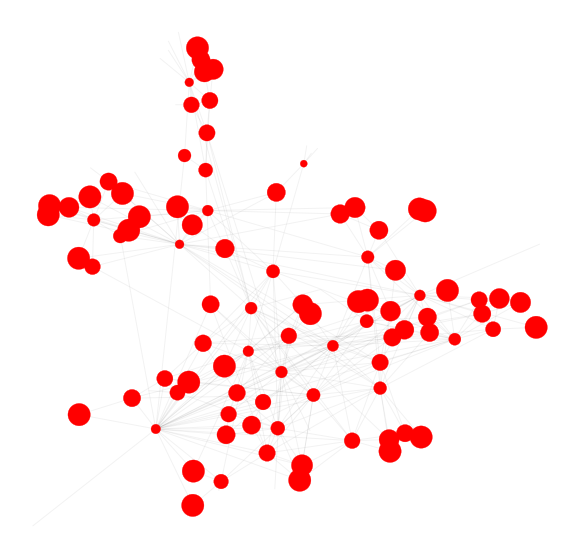

In [12]:
# Write your answer here (part1)
#!pip install fa2
import networkx as nx
from fa2 import ForceAtlas2

gotGraph = nx.from_pandas_edgelist(got, 'Source', 'Target', create_using=nx.Graph())
nodes = [key for key, value in nx.clustering(gotGraph).items()]
clustering = [value for key, value in nx.clustering(gotGraph).items()]
node_sizes = [c*500 for c in clustering]

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=2.0,

                        # Log
                        verbose=True)

pos = forceatlas2.forceatlas2_networkx_layout(gotGraph, pos=None, iterations=1000)

colors = {'1A':'red', '2A':'yellow', '3A':'blue', 
          '4A':'green','5A':'grey','1B':'black',
          '2B':'pink','3B':'purple','4B':'Orange',
          '5B':'white'}
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_nodes(gotGraph, pos, nodelist=nodes, node_size=node_sizes, node_shape='o', node_color='red')
nx.draw_networkx_edges(gotGraph, pos, alpha=0.05, edge_color='black')
plt.axis('off');

Name: 
Type: Graph
Number of nodes: 107
Number of edges: 352
Average degree:   6.5794


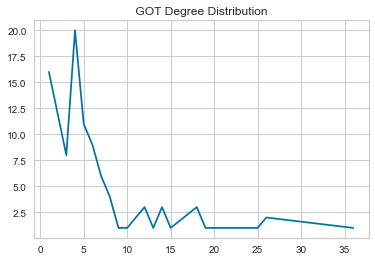

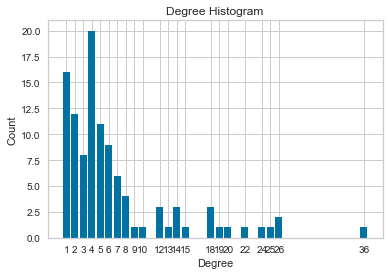

In [13]:
# Write your answer here (part2)

import networkx as nx
import matplotlib.pyplot as plt
import collections

G = nx.from_pandas_edgelist(got, 'Source', 'Target')
degree = {}
for d in G.nodes():
    deg = G.degree(d)
    if deg not in degree:
        degree[deg] = 0
    degree[deg] += 1
items = sorted(degree.items())
print(nx.info(G))
fig = plt.figure()
ax = fig.add_subplot (111)
ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
plt.title ( " GOT Degree Distribution " )
plt.show()

n=G.number_of_nodes()
e=G.number_of_edges()
degree_sequence=sorted([d for n, d in G.degree()], reverse=True)
degreeCount=collections.Counter(degree_sequence)
deg, cnt=zip(*degreeCount.items())
fig2 = plt.figure()
ax1 = fig2.add_subplot (111)
plt.bar(deg, cnt)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax1.set_xticks([d for d in deg])
ax1.set_xticklabels(deg);
plt.show()

In [14]:
# Write your answer here (part3)

avClu = nx.average_clustering(G)
print("Average Network clustering value : {}".format(avClu))

Average Network clustering value : 0.551443151559996


In [15]:
# Write your answer here (part4)
import operator

hbc = nx.betweenness_centrality(G)
maxHbc = max(hbc.items(), key=operator.itemgetter(1))[0]
print("{} has Highest betweeness centrality".format(maxHbc))

Jon has Highest betweeness centrality


In [16]:
# Write your answer here (part5)

hec = nx.eigenvector_centrality(G)
maxHec = max(hec.items(), key=operator.itemgetter(1))[0]
print("{} has Highest eigenvector centrality".format(maxHec))

Tyrion has Highest eigenvector centrality


In [17]:
# Write your answer here (part6)

pr = nx.pagerank(G)
maxPr = max(pr.items(), key=operator.itemgetter(1))[0]
print("{} has the highest pagerank value".format(maxPr))

Tyrion has the highest pagerank value


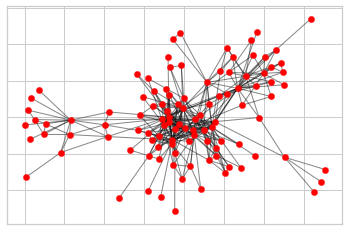

In [18]:
# Write your answer here (part7)
import community as cmt

# louvain algorithm -> https://python-louvain.readthedocs.io/en/latest/api.html
bPartition = cmt.best_partition(G, resolution=1.0)

size = float(len(set(bPartition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(bPartition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in bPartition.keys()
                                if bPartition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size=40, node_shape='o', node_color='red')


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Create a zip-folder and put your file in it.</li>
        <li>Upload the zip-folder into Canvas (Assignment #4)</li>
        <li>All the assignments should be submitted by <b> Monday May 4 at 7:00 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
</p> 